<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Circuitos%20El%C3%A9tricos%20I%20-%20Semana%2011.2%20-%20An%C3%A1lise%20de%20circuitos%20no%20dom%C3%ADnio%20de%20Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install -e .

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from circuit.utils import round_expr, symdisp, symplot
from circuit.laplace import adjustCoeff, expandDenom, partFrac
from circuit.laplace import laplaceT as LT
from circuit.laplace import invLaplaceT as invLT

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

c:\users\edson\onedrive\documentos\github\electriccircuits-private\circuit\utils.py:22: SyntaxWarning: invalid escape sequence '\m'
  display(Math(expr+ "\mathrm{"+unit+"}"))
c:\users\edson\onedrive\documentos\github\electriccircuits-private\circuit\utils.py:24: SyntaxWarning: invalid escape sequence '\;'
  display(Math(expr + sp.latex(var) + "\;" + "\mathrm{"+unit+"}"))
c:\users\edson\onedrive\documentos\github\electriccircuits-private\circuit\utils.py:24: SyntaxWarning: invalid escape sequence '\m'
  display(Math(expr + sp.latex(var) + "\;" + "\mathrm{"+unit+"}"))


In [3]:
sp.init_printing()

#### Definindo algumas variáveis simbólicas de interesse

In [4]:
s  = sp.symbols('s')
a, t = sp.symbols('a, t', real=True)
omega = sp.symbols('omega', real=True)
u = sp.Heaviside(t)

# *Circuitos Elétricos I - Semana 11*

### A integral de Laplace

Seja $f(t)$ uma função definida no intervalo $0\leq t \leq \infty$, com $t$ e $f(t)$ reais, então a função $F(s)$, definida pela integral de Laplace

$$\large
\begin{equation}
F(s)=\mathcal{L}\{f(t)\}=\int_{0}^{\infty} f(t) e^{-s t} dt,\;\; s \in \mathbb{C},
\end{equation}
$$

é conhecida como a transformada de Laplace de $f(t)$.

## Leis de Kirchhoff no domínio de Laplace


### Lei de Kirchhoff das tensões (LKT)

Para qualquer malha fechada no circuito:

Domínio do tempo: $$v_{1}(t)+v_{2}(t)+\cdots+v_{n}(t)=0$$

Domínio de Laplace: $$V_{1}(s)+V_{2}(s)+\cdots+V_{n}(s)=0$$

### Lei de Kirchhoff das correntes (LKC)

Para qualquer nó no circuito:

Domínio do tempo: $$i_{1}(t)+i_{2}(t)+\cdots+i_{n}(t)=0$$

Domínio de Laplace: $$I_{1}(s)+I_{2}(s)+\cdots+I_{n}(s)=0$$


## Representação de elementos ideais de circuitos no domínio de Laplace

$$
\begin{array}{|c|c|c|c|} 
\hline
\text{Elemento ideal} & \text{ Tensão vs corrente (tempo) } & \text{ Tensão vs corrente (Laplace)} & \text{Impedância } Z(s) = V(s)/I(s)\\
\hline \text{Resistor} & v(t)=R i(t) & V(s)=R I(s) & Z_{R}(s)=R \\
\text{Indutor} & v(t)=L \frac{d i(t)}{d t} & V(s)=s L I(s)-L i(0) & Z_{L}(s)=s L \\
\text{Capacitor} & v(t)=\frac{1}{C} \int_{0}^{t} i(\tau)d\tau+v(0) & V(s)=\frac{I(s)}{s C}+\frac{v(0)}{s} & Z_{C}(s)=\frac{1}{s C} \\ \hline
\end{array}
$$

### Problema 1

Não existe nenhuma energia armazenada no circuito da figura a seguir no momento em que a fonte de corrente é ligada.

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J14C1.png?raw=1" width="500">

a. Determine $I_a(s)$ e $I_b(s)$.\
b. Determine $i_a(t)$ e $i_b(t)$.\
c. Determine $V_a(s)$, $V_b(s)$ e $V_c(s)$.\
d. Determine $v_a(t)$, $v_b(t)$ e $v_c(t)$.

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J14C2.png?raw=1" width="500">

a. Determinando $I_a(s)$ e $I_b(s)$:

In [5]:
I2, I3, s = sp.symbols('I2, I3, s')

# define os sistema de equações
eq1 = sp.Eq((4 + s)*I2 - 2*I3, 4)             
eq2 = sp.Eq(-2*s*I2 + s*(4 + s)*I3, 8)  

# resolve o sistema
soluc = sp.solve([eq1, eq2],[I2, I3], dict=True)
soluc

I2 = [sol[I2] for sol in soluc]
I3 = [sol[I3] for sol in soluc]

I1 = 4/s
I2 = I2[0]
I3 = I3[0]

print('Correntes de malha no domínio de Laplace: \n')
symdisp('I_1(s) =', I1, 'As')
symdisp('I_2(s) =', I2, 'As')
symdisp('I_3(s) =', I3, 'As')

Correntes de malha no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Calculando Ia
Ia = I1-I2
Ia = Ia.simplify()

symdisp('I_a(s) =', Ia, 'As')

<IPython.core.display.Math object>

In [7]:
# Calculando Ib
Ib = I2

symdisp('I_b(s) =', Ib.simplify(), 'As')

<IPython.core.display.Math object>

b. Determinando $i_a(t)$ e $i_b(t)$

In [8]:
symdisp('I_a(s) =', round_expr(partFrac(Ia),2), 'As')

<IPython.core.display.Math object>

In [9]:
t = sp.symbols('t',real=True, positive=True)

ia = invLT(Ia,s,t, partialFractions=True)

symdisp('i_a(t) =', round_expr(ia,2), 'A')

<IPython.core.display.Math object>

In [10]:
symdisp('I_b(s) =', round_expr(partFrac(Ib),2), 'As')

<IPython.core.display.Math object>

In [11]:
ib = invLT(Ib,s,t, partialFractions=True)

symdisp('i_b(t) =', round_expr(ib,2), 'A')

<IPython.core.display.Math object>

c. Determinando $V_a(s)$, $V_b(s)$ e $V_c(s)$.

In [12]:
Va = (100/s)*I2
Vb = (100/s)*(I3-I2)
Vc = (100/s)*(I1-I3)

symdisp('V_a(s) =', Va.simplify(), 'Vs')
symdisp('V_b(s) =', Vb.simplify(), 'Vs')
symdisp('V_c(s) =', Vc.simplify(), 'Vs')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
symdisp('V_a(s) =', round_expr(partFrac(Va),2), 'Vs')

<IPython.core.display.Math object>

In [14]:
symdisp('V_b(s) =', round_expr(partFrac(Vb),2), 'Vs')

<IPython.core.display.Math object>

In [15]:
symdisp('V_c(s) =', round_expr(partFrac(Vc),2), 'Vs')

<IPython.core.display.Math object>

d. Determinando $v_a(t)$, $v_b(t)$ e $v_c(t)$.

In [16]:
va = invLT(Va, s, t, partialFractions=True)
va = round_expr(va,2)*u

symdisp('v_a(t) =', va, 'V')

<IPython.core.display.Math object>

In [17]:
vb = invLT(Vb, s, t, partialFractions=True)
vb = round_expr(vb,2)*u

symdisp('v_b(t) =', vb, 'V')

<IPython.core.display.Math object>

In [18]:
vc = va

symdisp('v_c(t) =', vc, 'V')

<IPython.core.display.Math object>

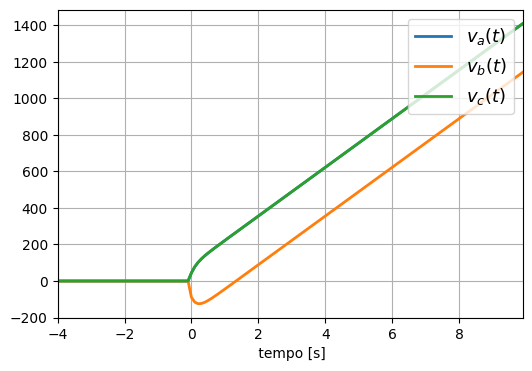

In [19]:
# plota funções no domínio do tempo
intervalo = np.arange(-4, 10, 0.1)
symplot(t, [va, vb, vc], intervalo, ['$v_a(t)$','$v_b(t)$','$v_c(t)$'])

Pergunta: estas soluções fazem sentido para o circuito analisado?

### Problema 2

Não existe nenhuma energia armazenada no circuito da figura a seguir no momento em que a fonte de tensão é conectada.

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J14C3.png?raw=1" width="600">

a. Determine $V_0(s)$.\
b. Determine $v_0(t)$.

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J14C4.png?raw=1" width="600">

In [20]:
Ia, Ib, s = sp.symbols('Ia, Ib, s')

# define o sistema de equações
eq1 = sp.Eq(10*Ia + (s + 250/s)*Ib, 35/s)             
eq2 = sp.Eq(Ia - (1 + 0.4*s)*Ib, 0)

# resolve o sistema
soluc = sp.solve([eq1, eq2],[Ia, Ib], dict=True)
soluc

Ia = [sol[Ia] for sol in soluc]
Ib = [sol[Ib] for sol in soluc]

Ia = Ia[0]
Ib = Ib[0]

In [21]:
symdisp('I_a(s) =', Ia.simplify(), 'As')

<IPython.core.display.Math object>

In [22]:
symdisp('I_b(s) =', Ib.simplify(), 'As')

<IPython.core.display.Math object>

In [23]:
V0 = 35/s - 2*Ia

symdisp('V_0(s) =', V0.simplify(), 'Vs')

<IPython.core.display.Math object>

In [24]:
symdisp('V_0(s) =', partFrac(V0), 'Vs')

<IPython.core.display.Math object>

In [25]:
raizes = np.roots([5, 10, 250, 0])
raizes

array([-1.+7.j, -1.-7.j,  0.+0.j])

In [26]:
K    = sp.symbols('K')
σ, ω = sp.symbols('σ, ω', real=True, positive=True)

j = sp.I

F = K/(s + σ + ω*j) + sp.conjugate(K)/(s + σ - ω*j)

symdisp('F(s) =', F.simplify())

<IPython.core.display.Math object>

In [27]:
symdisp('f(t) =', sp.re(sp.inverse_laplace_transform(F, s, t).simplify()))

<IPython.core.display.Math object>

In [28]:
v0 = invLT(V0, s, t, partialFractions=True)
v0 = round_expr(v0,2)*u

symdisp('v_0(t) =', v0)

<IPython.core.display.Math object>

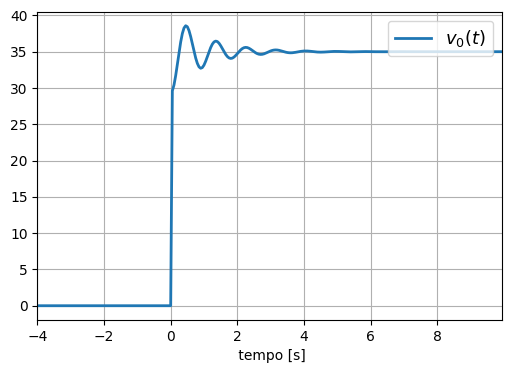

In [29]:
# plota funções no domínio do tempo
intervalo = np.arange(-4, 10, 0.05)
symplot(t, v0, intervalo, '$v_0(t)$')

### Problema 3

Problema visto nos slides da aula 24.

Simulação: https://tinyurl.com/23gkm54o

**Resolução via tensões de nó**

In [30]:
# tensão de nó
V1, V2, s = sp.symbols('V_1, V_2, s')

C = 100e-3
L = 20
Vg = 600/s

ZC = 1/(s*C)
ZL = s*L 

# define o sistema de equações
eq1 = sp.Eq((Vg - V1)/10, (V1 - V2)/ZL + V1/ZC)             
eq2 = sp.Eq((V1 - V2)/ZL, V2/140 + V1/4)

print('Sistema de equações via tensões de nó:')
symdisp('(1):', eq1)
symdisp('(2):', eq2)

# resolve o sistema
soluc = sp.solve([eq1, eq2],[V1, V2], dict=True)[0]

V1 = soluc[V1]
V2 = soluc[V2]

Sistema de equações via tensões de nó:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
print('Solução do sistema:')
symdisp('V_1(s) =', V1.simplify(), 'Vs')
symdisp('V_2(s) =', V2.simplify(), 'Vs')

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
symdisp('V_0(s) =', V2.simplify(), 'Vs')

<IPython.core.display.Math object>

In [33]:
V0 = V2
symdisp('V_0(s) =', partFrac(V0), 'Vs')

<IPython.core.display.Math object>

In [34]:
v0 = invLT(V0, s, t, partialFractions=True)
symdisp('v_0(t) =', v0, 'V')

<IPython.core.display.Math object>

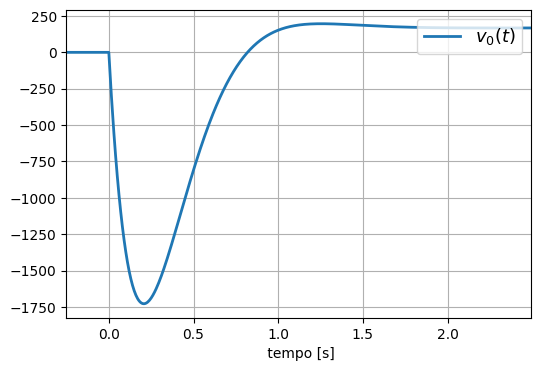

In [35]:
# plota funções no domínio do tempo
intervalo = np.arange(-0.25, 2.5, 0.005)
symplot(t, v0*u, intervalo, '$v_0(t)$')

 **Resolução via correntes de malha**

In [36]:
# Correntes de malha
Ia, Ib, Ic, s = sp.symbols('I_a, I_b, I_c, s')

C = 100e-3
L = 20
Vg = 600/s

ZC = 1/(s*C)
ZL = s*L 

Vϕ = ZC*(Ia - Ib)

# define o sistema de equações
eq1 = sp.Eq(-Vg + 10*(Ia + Ic) + ZC*(Ia-Ib), 0)             
eq2 = sp.Eq(-ZC*(Ia-Ib) + ZL*(Ib + Ic) + 140*Ib,0)
eq3 = sp.Eq(Ic, Vϕ/4)

print('Sistema de equações via correntes de malha:')
symdisp('(1):', eq1)
symdisp('(2):', eq2)
symdisp('(3):', eq3)

# resolve o sistema
soluc = sp.solve([eq1, eq2, eq3],[Ia, Ib, Ic], dict=True)[0]

Ia = soluc[Ia]
Ib = soluc[Ib]
Ic = soluc[Ic]

Sistema de equações via correntes de malha:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
print('Solução:')
symdisp('I_a(s) =', Ia.simplify(), 'As')
symdisp('I_b(s) =', Ib.simplify(), 'As')
symdisp('I_c(s) =', Ic.simplify(), 'As')

Solução:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
V0 = 140 * Ib
symdisp('V_0(s) = 140I_b(s) = ', V0.simplify(), 'Vs')

<IPython.core.display.Math object>

In [39]:
v0 = invLT(V0, s, t, partialFractions=True)
symdisp('v_0(t) =', v0, 'V')

<IPython.core.display.Math object>

## Ressonância em circuitos RLC

In [40]:
s, I = sp.symbols('s, I')
t = sp.symbols('t', real=True, positive=True)

R = 2
L = 0.25
C = 0.25

ω0 = 1/sp.sqrt(L*C)

vg = 10*sp.sin(ω0*t)
Vg = LT(vg, t, s)

ZL = s*L
Zc = 1/(s*C)

symdisp('v_g(t) = ', vg)
symdisp('V_g(s) = ', Vg)

eq = sp.Eq(-Vg + R*I + ZL*I + Zc*I, 0)
soluc = sp.solve(eq,[I], dict=True)[0]

I = soluc[I]
symdisp('I(s) =', adjustCoeff(I.simplify()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [41]:
symdisp('I(s) =', round_expr(partFrac(I),5), 'As')

<IPython.core.display.Math object>

In [42]:
i = invLT(I, s, t, partialFractions=True)
vC = invLT(I*Zc, s, t, partialFractions=True)
vL = invLT(I*ZL, s, t, partialFractions=True)

symdisp('i(t) =', round_expr(i,2), 'A')
symdisp('v_c(t) =', round_expr(vC,2), 'V')
symdisp('v_L(t) =', round_expr(vL,2), 'V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

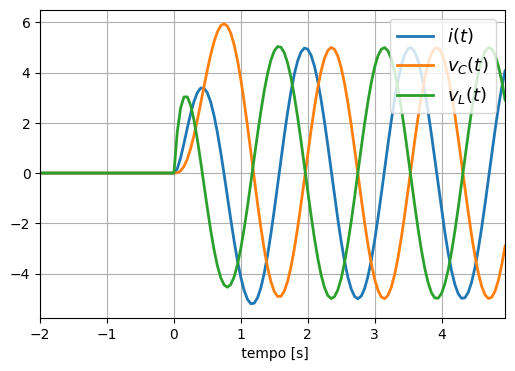

In [43]:
# plota funções no domínio do tempo
intervalo = np.arange(-2, 5, 0.05)
symplot(t, [i*u, vC*u, vL*u], intervalo, ['$i(t)$','$v_C(t)$','$v_L(t)$'])